In [ ]:
#!cp "/content/drive/MyDrive/ERGM-Project/PL Tests/Data/papers.csv" .

In [1]:
import nltk
import pandas as pd
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re
import matplotlib.pyplot as plt
nltk.download('words')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [2]:
df = pd.read_csv("smallPapers.csv")

In [3]:
titleCoef = 5
def repeat_to_length(s, wanted):
    return (s * (wanted//len(s) + 1))

In [4]:
text = ""

for index, row in df.iterrows():
  text += row["Abstract"] + " "
  text += repeat_to_length(row["Title"] + " ", len(row["Abstract"])) + " "

text = text.lower()

# Replacing Non-alphabetic Characters

In [5]:
import regex as re    
text=re.sub("[^\P{P}-]+", " ", text)

In [6]:
text = ''.join([i for i in text if not i.isdigit()])

# Tokenizing

In [7]:
tokens = nltk.word_tokenize(text)

In [8]:
len(set(tokens))

1979

In [ ]:
#tokens= [word for word in tokens if word.isalnum()]

In [ ]:
#len(set(tokens))

# Stemming

In [9]:
ps = PorterStemmer()
tokens = [ps.stem(word) for word in tokens]

In [10]:
len(set(tokens))

1444

In [11]:
sno = SnowballStemmer('english')
tokens = [sno.stem(word) for word in tokens]

In [12]:
len(set(tokens))

1424

# Lemmatizing

In [13]:
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

In [14]:
len(set(tokens))

1423

# Removing Stop Words

In [15]:
tokens = [word for word in tokens if word not in stopwords.words('english')]

In [16]:
len(set(tokens))

1337

# Removing meaningless words

In [ ]:
#english_vocab = set(w.lower() for w in nltk.corpus.words.words())
#tokens3 = [word for word in tokens if word in english_vocab]
#tokens2 = [word for word in tokens if wordnet.synsets(word)]

In [ ]:
#len(set(tokens3))

In [ ]:
#len(set(tokens2))

# Making Sorted Dictionary

In [17]:
freqDict = {i:tokens.count(i) for i in set(tokens)}

In [18]:
freqDict = {k: v for k, v in sorted(freqDict.items(), key=lambda item: item[1], reverse=True)}

In [19]:
freqDict = {key:val for key, val in freqDict.items() if val > 1}

In [20]:
len(freqDict)

787

In [ ]:
words = pd.DataFrame(list(freqDict.items()),
                   columns=['Word', 'Frequency'])

In [ ]:
words.to_csv("words.csv", index=False)

In [ ]:
list(freqDict.values())

# Drawing Histogram

In [ ]:
freqDict = {key:val for key, val in freqDict.items() if val > 1}

In [ ]:
values = list(freqDict.values())

<BarContainer object of 553 artists>

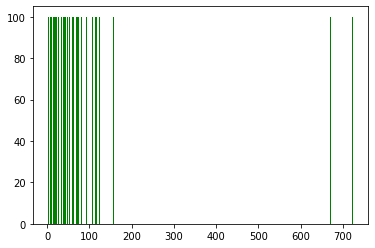

In [ ]:
plt.bar(values, 100, color='g')

# Removing Frequent Words

In [ ]:
left = [-1*x for x in values]

In [ ]:
symmetric = left + values

In [ ]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
m, min, max = mean_confidence_interval(symmetric, 0.99999)

In [ ]:
reducedDict = {key:val for key, val in freqDict.items() if val < max}

In [ ]:
len(reducedDict)

497

# Removing Outliers

In [ ]:
restValues = list(freqDict.values())
restValues = sorted(restValues)

In [ ]:
q1, q3= np.percentile(restValues, [10,90])

In [ ]:
iqr = q3 - q1

In [ ]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [ ]:
smallestDict = {key:val for key, val in freqDict.items() if val > lower_bound}

In [ ]:
len(smallestDict)

783

In [ ]:
smallestDict[list(smallestDict)[0]]

6

In [ ]:
smallestDict[list(smallestDict)[-1]]

2

# Final list of words

In [ ]:
freqDict

In [22]:
#reference = ['scratch', 'reactiv', 'inherit', 'first-class', 'interpret', 'flapjax', 'learn', 'ajax', 'call-by-valu', 'quorum', \
#             'interfac', 'graph', 'declar', 'type-check', 'haskel', 'game', 'language-knowledg', 'type', 'design', 'develop', 'implement']
#reference = ['reactiv', 'flapjax', 'interact', 'object-ori', 'polymorph', 'dataflow', 'scala', 'aspectj', 'construct', 'abstract', \
#             'repositori','formal', 'ml', 'lisa', 'polymorph', 'compil', 'type', 'develop', 'implement', 'languag']
#reference = ['flapjax', 'interact', 'dataflow', 'scala', 'c++', 'java', 'modul', 'dynam', 'static', 'aspect', 'web', 'adopt', 'environ', 'syntax', 'model', 'scalabl', 'type', 'develop', 'implement', 'languag']

reference = ['flapjax', 'interact', 'dataflow', 'scala', 'c++', 'java', 'adopt', 'reactiv', 'aspect-ori', 'object-ori', \
             'type-check', 'language-knowledg', 'semant', 'algebra', 'modular', 'evalu', 'type', 'develop', 'implement', 'languag']

In [ ]:
reducedDict

In [ ]:
#for word in reference:
 # if len(word) == 1:
  #  reference.remove(word)

In [ ]:
#reference = list()
#count = 0
#for word in freqDict.keys():
#  if count >= 50:
#    break
#  if len(word) != 1 and word != "the":
#    reference.append(word)
#    count += 1

In [23]:
len(reference)

20

# Building Vectors

In [24]:
df.rename({'Abstract': 'ghazal'}, axis=1, inplace=True)

In [25]:
for i in range(len(reference)):
  df[reference[i]] = 0.0

In [26]:
for index, row in df.iterrows():
  nodeText = ""
  nodeText += row["ghazal"] + " "
  nodeText += repeat_to_length(row["Title"] + " ", len(row["ghazal"])) + " "

  nodeText = nodeText.lower()
  nodeText = re.sub("[^\P{P}-]+", " ", nodeText)
  nodeText = ''.join([i for i in nodeText if not i.isdigit()])
  tokens = nltk.word_tokenize(nodeText)
  ps = PorterStemmer()
  tokens = [ps.stem(word) for word in tokens]
  sno = SnowballStemmer('english')
  tokens = [sno.stem(word) for word in tokens]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  tokens = [word for word in tokens if word not in stopwords.words('english')]
  #tokens = [word for word in tokens if word in english_vocab]
  freqDict = {i:tokens.count(i) for i in set(tokens)}

  for i in range(len(reference)):
    if reference[i] in freqDict:
      df.at[index, reference[i]] = freqDict[reference[i]]

In [27]:
for index, row in df.iterrows():
  sum = 0
  for i in range(len(reference)):
    sum += row[reference[i]]
  for i in range(len(reference)):
    if sum != 0:
      df.at[index, reference[i]] = row[reference[i]] / sum

In [ ]:
for index, row in df.iterrows():
  for i in range(len(reference)):
    if row[reference[i]] != 0:
      print(index)

In [28]:
df.drop(['ghazal', 'Title'], axis=1, inplace=True)

In [29]:
df.drop(['Year'], axis=1, inplace=True)

In [30]:
df

ID   flapjax  interact  dataflow     scala       c++      java     adopt  \
0     1  0.000000  0.000000  0.000000  0.428571  0.000000  0.000000  0.000000   
1     3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     4  0.108108  0.027027  0.027027  0.000000  0.000000  0.000000  0.000000   
3     6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.386667   
5     8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6     9  0.000000  0.000000  0.000000  0.000000  0.000000  0.058824  0.000000   
7    12  0.000000  0.000000  0.000000  0.000000  0.279070  0.023256  0.000000   
8    14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9    24  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10   28  0.000000  0.290323  0.000000  0.000000  0.000000  0.000000  0.000000   
11   40  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12   48  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13   53  0.000000  0.000000  0.000000  0.000000  0.000000  0.428571  0.000000   
14   57  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.408163   
15   60  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16   61  0.000000  0.000000  0.000000  0.000000  0.027778  0.111111  0.000000   
17   62  0.000000  0.285714  0.000000  0.000000  0.000000  0.000000  0.000000   
18   63  0.000000  0.000000  0.000000  0.000000  0.000000  0.827586  0.000000   
19   64  0.000000  0.000000  0.000000  0.000000  0.000000  0.041667  0.000000   
20   65  0.000000  0.000000  0.000000  0.000000  0.000000  0.047619  0.000000   
21   66  0.000000  0.000000  0.000000  0.000000  0.000000  0.142857  0.000000   
22   67  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23   76  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24   77  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25   78  0.000000  0.076923  0.000000  0.000000  0.000000  0.076923  0.000000   
26   79  0.000000  0.555556  0.000000  0.000000  0.000000  0.000000  0.000000   
27   80  0.000000  0.125000  0.000000  0.000000  0.000000  0.375000  0.000000   
28   81  0.000000  0.052632  0.052632  0.000000  0.000000  0.000000  0.000000   
29   82  0.000000  0.000000  0.000000  0.000000  0.000000  0.500000  0.000000   
30   83  0.000000  0.028571  0.400000  0.000000  0.000000  0.000000  0.000000   
31   84  0.000000  0.015873  0.000000  0.000000  0.000000  0.492063  0.000000   
32   85  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
33   86  0.000000  0.000000  0.019608  0.000000  0.000000  0.000000  0.000000   
34   87  0.000000  0.000000  0.115385  0.000000  0.000000  0.000000  0.000000   
35   88  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
36   94  0.000000  0.000000  0.000000  0.000000  0.000000  0.333333  0.000000   
37   96  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
38   97  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39   98  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
40   99  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.045455   
41  100  0.450980  0.019608  0.019608  0.000000  0.000000  0.000000  0.000000   
42  101  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
43  102  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
44  103  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.288889   
45  104  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
46  105  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
47  106  0.000000  0.000000  0.000000  0.000000  0.000000  0.052632  0.000000   
48  107  0.000000  0.000000  0.00000

In [34]:
df.to_csv("nodes25.csv", index =False)

In [32]:
!mv "/content/nodes25.csv" "/content/drive/MyDrive/ERGM-Project/PL Tests/Data/nodes25.csv"

In [33]:
formula = "ergmNetwork ~ edges "
for i in range(len(reference)):
  formula += "+ nodecov('" + reference[i] + "') "
print(formula)

ergmNetwork ~ edges + nodecov('flapjax') + nodecov('interact') + nodecov('dataflow') + nodecov('scala') + nodecov('c++') + nodecov('java') + nodecov('adopt') + nodecov('reactiv') + nodecov('aspect-ori') + nodecov('object-ori') + nodecov('type-check') + nodecov('language-knowledg') + nodecov('semant') + nodecov('algebra') + nodecov('modular') + nodecov('evalu') + nodecov('type') + nodecov('develop') + nodecov('implement') + nodecov('languag') 
